In [1]:
import pandas as pd
import numpy as np 
import dabl
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
# documentation - https://github.com/8080labs/ppscore#calculation-of-the-pps

# example - https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
## check for multicolinearality 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF = variance_inflation_factor



In [20]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

In [4]:

df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],
     'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9],
     'd': [4, 3, 4, 5, 4]}
)
X = add_constant(df)
X

,const,a,b,c,d
0,1.0,1,2,4,4
1,1.0,1,2,6,3
2,1.0,2,3,7,4
3,1.0,3,2,8,5
4,1.0,4,1,9,4


In [5]:
X = df.assign(const=1)
X

,a,b,c,d,const
0,1,2,4,4,1
1,1,2,6,3,1
2,2,3,7,4,1
3,3,2,8,5,1
4,4,1,9,4,1


In [6]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


a         22.950
b          3.000
c         12.950
d          3.000
const    136.875
dtype: float64

In [7]:
pps.score(df, 'c', "b")

{'x': 'c',
 'y': 'b',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.4,
 'model_score': 0.75,
 'model': DecisionTreeRegressor()}

In [36]:
pps.predictors(df, "b")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,a,b,0,regression,True,mean absolute error,0.4,0.625,DecisionTreeRegressor()
1,c,b,0,regression,True,mean absolute error,0.4,0.750,DecisionTreeRegressor()
2,d,b,0,regression,True,mean absolute error,0.4,0.750,DecisionTreeRegressor()


In [37]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,a,a,1.000,predict_itself,True,None,0.0,1.000000,None
1,a,b,0.000,regression,True,mean absolute error,0.4,0.625000,DecisionTreeRegressor()
2,a,c,0.000,regression,True,mean absolute error,1.4,1.625000,DecisionTreeRegressor()
3,a,d,0.000,regression,True,mean absolute error,0.4,0.875000,DecisionTreeRegressor()
4,b,a,0.000,regression,True,mean absolute error,1.0,1.166667,DecisionTreeRegressor()
5,b,b,1.000,predict_itself,True,None,0.0,1.000000,None
6,b,c,0.000,regression,True,mean absolute error,1.4,2.500000,DecisionTreeRegressor()
7,b,d,0.375,regression,True,mean absolute error,0.4,0.250000,DecisionTreeRegressor()
8,c,a,0.250,regression,True,mean absolute error,1.0,0.750000,DecisionTreeRegressor()
9,c,b,0.000,regression,True,mean absolute error,0.4,0.750000,DecisionTreeRegressor()


In [50]:
predictors_df = pps.predictors(df, y="b")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,a,b,0,regression,True,mean absolute error,0.4,0.625,DecisionTreeRegressor()
1,c,b,0,regression,True,mean absolute error,0.4,0.750,DecisionTreeRegressor()
2,d,b,0,regression,True,mean absolute error,0.4,0.750,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

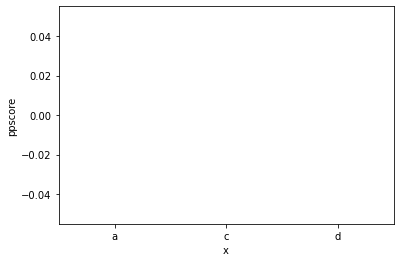

In [48]:
import seaborn as sns
predictors_df = pps.predictors(df, y="b")
sns.barplot(data=predictors_df, x="x", y="ppscore")

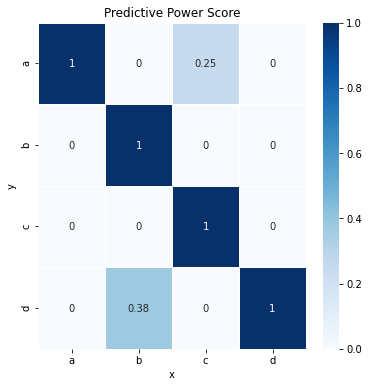

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('Predictive Power Score')
plt.show()

In [12]:
matrix_df

x,error,x,y
y,,,
error,1.0,0.000000,0.0
x,0.0,1.000000,0.0
y,0.0,0.674354,1.0


In [13]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.251613,0.337260,DecisionTreeRegressor()
2,x,y,0.674354,regression,True,mean absolute error,1.035696,0.337270,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.997206,1.360050,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.035696,1.304797,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.997206,1.098186,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.251613,0.278039,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None
